Data Analysis Practice II-E2 

# Final Project


___

* **Name**:  <span style="color:blue">Lolelanji Simposya</span>
* **Student number**:  <span style="color:blue">6530-30-7587</span>
* **Project theme**:  <span style="color:blue">Japan at the Olympics</span>
* **Project purpose**:  <span style="color:blue">The purpose of this project was to determine the correlates of total medals earned by Japanese athletes during the olympics.</span>

___

## Dataset description

**Dataset source(s)**

* <span style="color:blue">[Olympic 120 year history](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)</span>
* <span style="color:blue">[World bank global population estimates](https://www.kaggle.com/theworldbank/global-population-estimates)</span>
* <span style="color:blue">[World bank historical GDP per capita](https://data.worldbank.org/indicator/NY.GDP.PCAP.CN)</span>


**Overview**

* <span style="color:blue">Olympic 120 year history:</span><br/>
Dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. Provides data on all athletes that competed in all the games. Credit to Kaggle user rgriffin who scraped the data off of https://www.sports-reference.com.

* <span style="color:blue">World bank global population estimates:</span><br/>
This database presents population and other demographic estimates and projections from 1960 to 2050, covering more than 200 economies. It includes population data by various age groups, sex, urban/rural; fertility data; mortality data; and migration data.

* <span style="color:blue">World bank historical GDP per capita:</span><br/>
This database presents World Bank national accounts data, and OECD National Accounts data files for different countries over time.


**Variables**

<span style="color:blue">**Independent variables:**</span>
* <span style="color:blue">GDP</span>
* <span style="color:blue">Median Age of Olympic athletes</span>
* <span style="color:blue">Population</span>


<span style="color:blue">**Dependent variables:**</span>
* <span style="color:blue">Total Olympic Medals earned</span>


___

## Data parsing using Python

**Python functions used**

<span style="color:blue">Pandas was used extensively to parse through the data.</span>



* <span style="color:blue">`pd.read_csv`</span>
* <span style="color:blue">`df.loc`</span>
* <span style="color:blue">`df.drop_duplicates`</span>
* <span style="color:blue">`np.isfinite`</span>
* <span style="color:blue">`df.tolist`</span>

**Overview**

* <span style="color:blue">I used `pd.read_csv` to parse all three data sets. (**athlete_events.csv, gdp.csv, data.csv**).</span>
* <span style="color:blue">I used `df.loc` to parse for specific data in the data sets.</span>
* <span style="color:blue">I used `df.drop_duplicates` to drop duplicates in the dataset that could skew results.</span>
* <span style="color:blue">I used `np.isfinite` to take into account missing data.</span>
* <span style="color:blue">I used `df.tolist` to perform operations on data.</span>


**Parsing difficulties**

* <span style="color:blue">Extracting player ages was difficult because data was not available for all Olympic athletes. I discarded players who did not have age data.</span>
* <span style="color:blue">Some olympic events, such as baseball, resulted in multiple medal winners from the same team. I had to remove duplicates using `df.drop_duplicates`  </span>
* <span style="color:blue"> GDP and Population data files were difficult to parse due to an encoding error. The csv files had to be slightly changed and the encoding had to be modified (encoding = "ISO-8859-1")  </span>



In [11]:
# {enter code for parsing data here}
import pandas as pd
import Module
import importlib
importlib.reload(Module)
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import lecture12util as lu

country = 'JPN'
year = 1960
season = 's'

bronze_count,silver_count,gold_count,medal_count= Module.medal_count(country, year, season)

age,average_age,median_age, mode_age = Module.age_calc(country, year, season)
gross, years = Module.GDP(country,year)
pop,years =  Module.population(country,year)

C:\Users\Lolelanji Simposya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Lolelanji Simposya\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


___

## Analysis Methods

* <span style="color:blue">Regression between total medal count and GDP, Population and Median age of Olympic athletes.</span>
* <span style="color:blue">t tests comparing high medal counts to low medal count  groups.</span>
* <span style="color:blue">k-means clustering of total medal count and GDP, Population and Median age of Olympic athletes.</span>


___

## Results

### Dataset description


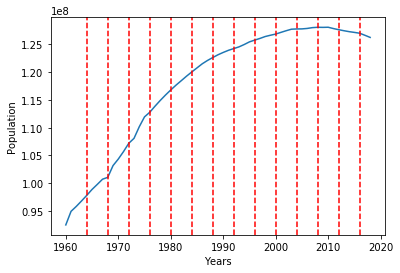

In [12]:
# {Enter code for "Dataset description" figures / tables here}
plt.figure()
markers_on = [1964, 1968, 1972, 1976,1980, 1984, 1988, 1992,1996, 2000, 2004, 2008,2012,2016]
r = len(markers_on)

plt.plot(years,pop)

#print(years)
#print(pop)

plt.xlabel("Years")
plt.ylabel("Population")
for i in range(r):
    plt.axvline( markers_on[i] ,linestyle='dashed', color= "red", label='Olympic Years' )
plt.show()

This figure shows the changing total population of Japan from 1960 to 2016 in the form of a line graph. The red dashed lines represent the years in which summer Olympic games were held.

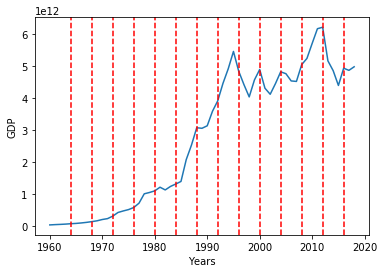

In [13]:
plt.figure()
markers_on = [1964, 1968, 1972, 1976,1980, 1984, 1988, 1992,1996, 2000, 2004, 2008,2012,2016]
r = len(markers_on)
plt.plot(years,gross)
plt.xlabel("Years")
plt.ylabel("GDP")

#print(years)
#print(gross)

for i in range(r):
    plt.axvline( markers_on[i] ,linestyle='dashed', color= "red", label='Olympic Years' )
plt.show()

This figure illustrates Japan's changing GDP from 1960 to 2016 in the form of a line graph. The red dashed lines represent the years in which summer Olympic games were held.

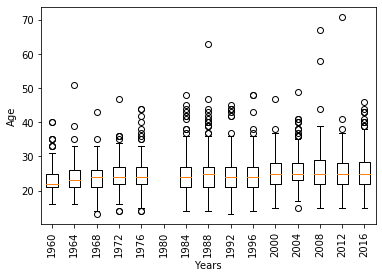

In [14]:
plt.figure()
plt.boxplot(age)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], ['1960', '1964', '1968', '1972','1976', '1980', '1984', '1988','1992', '1996', '2000', '2004','2008','2012', '2016'], rotation='vertical')
plt.xlabel("Years")
plt.ylabel("Age")
plt.show()

This figure illustrates the age distribution of Japanese athletes at the different Olympic events in the form of boxplots.

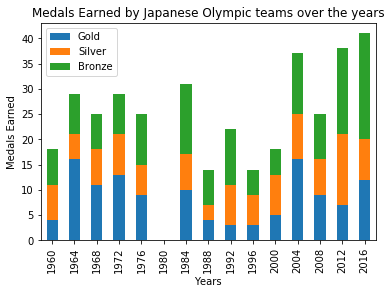

In [15]:
df_bar=pd.DataFrame({'Gold':gold_count, 'Silver':silver_count, 'Bronze':bronze_count})
df_bar.plot(kind='bar', stacked=True, title = 'Medals Earned by Japanese Olympic teams over the years')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], [ '1960','1964', '1968', '1972','1976', '1980', '1984', '1988','1992', '1996', '2000', '2004','2008','2012', '2016'], rotation='vertical')
plt.xlabel("Years")
plt.ylabel("Medals Earned")
plt.show()

This figure illustrates the medal count of Japanese athletes at the different Olympic events in the form of a stacked bar graph.

### Hypothesis testing results

<span style="color:blue">{Create 1-5 figures or tables using Python to describe your hypothesis testing results.}</span>

<span style="color:blue">{Use Markdown cells to breifly describe each figure / table.}</span>

In [17]:
olympic_years = [1960,1964, 1968, 1972, 1976, 1984, 1988, 1992,1996, 2000, 2004, 2008,2012,2016] 

GDP_olympic_years = []
pop_olympic_years = []
median_age_olympic_athletes = []


for i in range(len(age)):
    median_age_olympic_athletes.append(np.median(age[i]))
    
median_age_olympic_athletes1 = median_age_olympic_athletes[0:5]
median_age_olympic_athletes2 = median_age_olympic_athletes[6:]
true_median_age_olympic_athletes = median_age_olympic_athletes1 + median_age_olympic_athletes2

#print(true_median_age_olympic_athletes)

medal_count_years1 = medal_count[0:5]
medal_count_years2 = medal_count[6:]
medal_count_years = medal_count_years1 + medal_count_years2

for i in range(len(olympic_years)):
    indexPos = years.index(olympic_years[i])
    GDP_olympic_years.append(gross[indexPos])
    pop_olympic_years.append(pop[indexPos])

results_GDP  = stats.linregress(GDP_olympic_years,medal_count_years)
p_GDP        = results_GDP.pvalue
#print(p_GDP)

R_gdp = np.corrcoef(GDP_olympic_years,medal_count_years)
r_gdp  = R_gdp[0,1]
#print(r_gdp)

results_pop  = stats.linregress(pop_olympic_years,medal_count_years)
p_pop        = results_pop.pvalue
#print(p_pop)

R_pop = np.corrcoef(pop_olympic_years,medal_count_years)
r_pop  = R_pop[0,1]
#print(r_pop)

results_median_age  = stats.linregress(true_median_age_olympic_athletes,medal_count_years)
p_median_age        = results_median_age.pvalue
#print(p_median_age)

R_median_age = np.corrcoef(true_median_age_olympic_athletes,medal_count_years)
r_median_age  = R_median_age[0,1]
#print(r_median_age)


-| GDP | Population | Median age
------------ | ------------ | ------------- | -------------
p value | 0.532  |  0.547 | 0.305
Strength of correlation |  0.182| 0.176   | 0.295


The table shows the p-value and strength of correlation between the dependent variables (GDP, Population and Median age) and the total medal count.

In [18]:
medal_count_pre1 = medal_count[0:5]
medal_count_pre2 = medal_count[6:7]

medal_count_before = medal_count_pre1 + medal_count_pre2
medal_count_after = medal_count[9:]

t,p    = stats.ttest_ind(medal_count_before, medal_count_after)

print(t)
print(p)

-0.5299291681082808
0.6077254781480763


 -| t value | p value |
------------ | ------------ | ------------- | 
 | 0.530  |  0.608 | 
 
 


Two-sample t test to compare the medal counts in which Japan had a high GDP and low GDP. The p value is not less than  α =0.05, so  H0  is not rejected.

### Machine learning

<span style="color:blue">{Create 1-5 figures or tables using Python to describe your machine learning results.}</span>

<span style="color:blue">{Use Markdown cells to breifly describe each figure / table.}</span>

Fitted cluster labels:  [1 1 1 1 1 1 0 0 0 0 0 0 0]
[0.31881859 0.16773585] 1.0


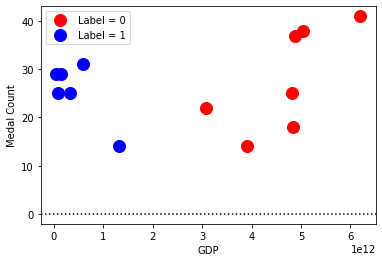

In [19]:
# {Enter code for "Machine learning" figures / tables here}

k =[]
k[0:] = medal_count_years
k[:1] = GDP_olympic_years

k_final = np.column_stack((k[0:13], k[14:]))
k_final.shape

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(k_final)
labels = kmeans.labels_
print( f'Fitted cluster labels:  {labels}' )
plt.xlabel("GDP")
plt.ylabel("Medal Count")
lu.plot_labeled_points(k_final, labels, colors=['r','b'])
dw,db   = lu.average_distances(k_final, labels, ratios=True)
print(dw, db)

Fitted cluster labels:  [1 1 1 1 1 1 0 0 0 0 0 0 0]


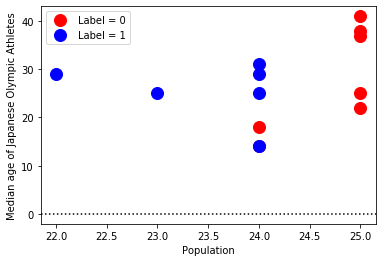

In [20]:
# {Enter code for "Machine learning" figures / tables here}

k1 =[]
k1[0:] = medal_count_years
k1[:1] = true_median_age_olympic_athletes

k_final1 = np.column_stack((k1[0:13], k1[14:]))
k_final.shape

kmeans1 = KMeans(n_clusters=2, random_state=0)
kmeans.fit(k_final1)
labels1 = kmeans.labels_
plt.xlabel("Population")
plt.ylabel("Median age of Japanese Olympic Athletes")
print( f'Fitted cluster labels:  {labels}' )
lu.plot_labeled_points(k_final1, labels, colors=['r','b'])

Fitted cluster labels:  [1 1 1 1 1 1 0 0 0 0 0 0 0]
[0.15815319 0.77493512] 1.0


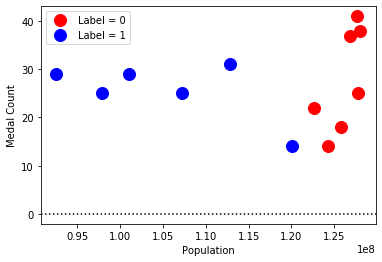

In [21]:
# {Enter code for "Machine learning" figures / tables here}

k2 =[]
k2[0:] = medal_count_years
k2[:1] = pop_olympic_years

k_final2 = np.column_stack((k2[0:13], k2[14:]))
k_final2.shape

#print(k_final)

#a = [1, 2]
#np.asarray(a)

kmeans1 = KMeans(n_clusters=2, random_state=0)
kmeans.fit(k_final2)
labels1 = kmeans.labels_
print( f'Fitted cluster labels:  {labels}' )
lu.plot_labeled_points(k_final2, labels, colors=['r','b'])
plt.xlabel("Population")
plt.ylabel("Medal Count")
dw,db   = lu.average_distances(k_final2, labels, ratios=True)
print(dw, db)

___

## Summary

* <span style="color:blue">Linear regression found that median age was most highly correlated with medals earned (p = 0.305). Suggesting that experience plays a key role in olympic performance.</span>
* <span style="color:blue">Two-sample t tests comparing years in which Japan had a high GDP and low GDP found that medals earned were not significantly different (p=0.608).</span>
* <span style="color:blue">k-means clustering showed that high medal counts and low medal counts were highly separable based on total population size. This could suggest a larger population fosters greater competition which in turn results in better Olympic athletes.</span>

<span style="color:blue">This project explored the effects that the dependent variables (GDP, Population and Median age of athletes) had on the total medals achieved by Japan at the olympic games. The effect of GDP did not have a significant effect, based on the two sample t test. The results suggest a significant effect from median age of athletes and population variables.</span>